# LiveEO Data Science Challenge - Thibault Latrace

Import of the libraries that will be used in the study :

In [81]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Exploration of the labeled dataset metadata :

In [48]:
dataset = rasterio.open('rasterize_on_sentinel_2_labelled_17SLD.tif')

print(dataset.meta)

# Outputs :

# crs : EPSG 32617 --> referencing the UTM zone 17N
# shape : (10980, 10980)
# dtype : uint32
# number of bands : 2 --> only the first one will be used

{'driver': 'GTiff', 'dtype': 'uint32', 'nodata': 4294967295.0, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32617), 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 4400040.0)}


Visualization of the dataset :

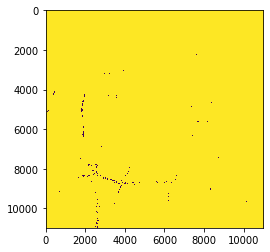

In [50]:
labeled_band = dataset.read(1)

plt.imshow(labeled_band)

# It seems like a satellite image of islands

# TODO : translate the coordinates of the TIF file into Mercator coordinates to visualize it on Google

Transformation of the labelled band into a DataFrame in order to ease the manipulation:

In [57]:
ravelled_label_band = labeled_band.ravel()

label_band_df = pd.DataFrame(ravelled_label_band)

label_band_df = label_band_df.replace(4294967295, np.nan)

previous_label_band_size = label_band_df.shape

Drop of the label nodata values :

In [101]:
reduced_label_band_df = label_band_df.dropna().rename(columns = {0: 'label'})

new_label_band_size = reduced_label_band_df.shape

print(previous_label_band_size[0]/new_label_band_size[0])

# Output : 369.37415553737696

# We just divided by almost 400 the size of our dataset !!!
# It will be a lot more convenient to work with this size-reduced data for the machine learning process

369.37415553737696


Concatenation of the labeled layer and the first band of the dataset, by projecting the band where the labeled data is not null : 

In [ ]:
bands_folder_path = 'S2_17SLD_2019-09-15_masked_warped'

band_paths = [os.path.join(bands_folder_path, my_file)
              for my_file in os.listdir(bands_folder_path)
              if os.path.isfile(os.path.join(bands_folder_path, my_file))]

final_dataset = reduced_label_band_df
for band_number in range(len(band_paths)):
    with rasterio.open(band_paths[band_number]) as band_dataset:
        band = band_dataset.read(1)
        ravelled_band = band.ravel()
        band_df = pd.DataFrame(ravelled_band).rename({0: f'band {band_number}'})
        
        final_dataset = pd.concat([final_dataset, band_df.reindex(final_dataset.index)], axis = 1)
        band_dataset.close()
        print(final_dataset)